In [335]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
import xgboost


In [336]:
train = pd.read_csv('/home/hasan/DATA SET/Housing Price AdvanceRegression/train.csv')

In [337]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [338]:
print('Shape of the train data :',train.shape)

Shape of the train data : (1460, 81)


# Feature Engineering

In [339]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [340]:
#checking null value
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

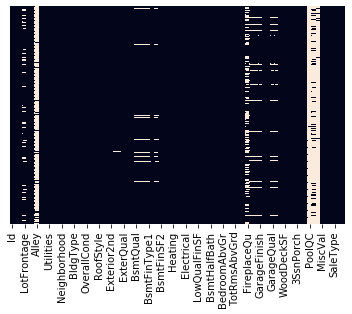

In [341]:
#vsualizing null value in graph
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [342]:
'''#handling null in MSZoning column
n_null = train['MSZoning'].isnull().sum()
print('Total null in MSZoning column :', n_null)

train['MSZoning'] = train['MSZoning'].fillna(train['MSZoning'].mode()[0])'''

"#handling null in MSZoning column\nn_null = train['MSZoning'].isnull().sum()\nprint('Total null in MSZoning column :', n_null)\n\ntrain['MSZoning'] = train['MSZoning'].fillna(train['MSZoning'].mode()[0])"

In [343]:
#handling null in LotFrontage column
n_null = train['LotFrontage'].isnull().sum()
print('Total null in LotFrontage column :', n_null)

train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())

Total null in LotFrontage column : 259


In [344]:
#handling null in Alley column
train.drop('Alley', axis=1, inplace=True)

In [345]:
#handling null in Utilities column
n_null = train['Utilities'].isnull().sum()
print('Total null in Utilities column :', n_null)
train['Utilities'] = train['Utilities'].fillna(train['Utilities'].mode()[0])

Total null in Utilities column : 0


In [346]:
'''#handling null in Exterior1st column
n_null = train_test['Exterior1st'].isnull().sum()
print('Total null in Exterior1st column :', n_null)
train_test['Exterior1st'] = train_test['Exterior1st'].fillna(train_test['Exterior1st'].mode()[0])'''

"#handling null in Exterior1st column\nn_null = train_test['Exterior1st'].isnull().sum()\nprint('Total null in Exterior1st column :', n_null)\ntrain_test['Exterior1st'] = train_test['Exterior1st'].fillna(train_test['Exterior1st'].mode()[0])"

In [347]:
'''#handling null in Exterior2nd column
n_null = train['Exterior2nd'].isnull().sum()
print('Total null in Exterior2nd column :', n_null)
train['Exterior2nd'] = train['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0])'''

"#handling null in Exterior2nd column\nn_null = train['Exterior2nd'].isnull().sum()\nprint('Total null in Exterior2nd column :', n_null)\ntrain['Exterior2nd'] = train['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0])"

In [348]:
#handling null in MasVnrType column
n_null = train['MasVnrType'].isnull().sum()
print('Total null in MasVnrType column :', n_null)
train['MasVnrType'] = train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])

Total null in MasVnrType column : 8


In [349]:
#handling null in MasVnrArea column
n_null = train['MasVnrArea'].isnull().sum()
print('Total null in MasVnrArea column :', n_null)
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mode()[0])

Total null in MasVnrArea column : 8


In [350]:
#handling null in BsmtQual column
n_null = train['BsmtQual'].isnull().sum()
print('Total null in BsmtQual column :', n_null)
train['BsmtQual'] = train['BsmtQual'].fillna(train['BsmtQual'].mode()[0])

Total null in BsmtQual column : 37


In [351]:
#handling null in BsmtCond column
n_null = train['BsmtCond'].isnull().sum()
print('Total null in BsmtCond column :', n_null)
train['BsmtCond'] = train['BsmtCond'].fillna(train['BsmtCond'].mode()[0])

Total null in BsmtCond column : 37


In [352]:
#handling null in BsmtExposure column
n_null = train['BsmtExposure'].isnull().sum()
print('Total null in BsmtExposure column :', n_null)
train['BsmtExposure'] = train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0])

Total null in BsmtExposure column : 38


In [353]:
#handling null in BsmtFinType1 column
n_null = train['BsmtFinType1'].isnull().sum()
print('Total null in BsmtFinType1 column :', n_null)
train['BsmtFinType1'] = train['BsmtFinType1'].fillna(train['BsmtFinType1'].mode()[0])

Total null in BsmtFinType1 column : 37


In [354]:
'''#handling null in BsmtFinSF1 column
n_null = train['BsmtFinSF1'].isnull().sum()
print('Total null in BsmtFinSF1 column :', n_null)
train['BsmtFinSF1'] = train['BsmtFinSF1'].fillna(train['BsmtFinSF1'].mean())'''

"#handling null in BsmtFinSF1 column\nn_null = train['BsmtFinSF1'].isnull().sum()\nprint('Total null in BsmtFinSF1 column :', n_null)\ntrain['BsmtFinSF1'] = train['BsmtFinSF1'].fillna(train['BsmtFinSF1'].mean())"

In [355]:
#handling null in BsmtFinType2 column
n_null = train['BsmtFinType2'].isnull().sum()
print('Total null in BsmtFinType2 column :', n_null)
train['BsmtFinType2'] = train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode()[0])

Total null in BsmtFinType2 column : 38


In [356]:
'''#handling null in BsmtFinSF2 column
n_null = train['BsmtFinSF2'].isnull().sum()
print('Total null in BsmtFinSF2 column :', n_null)
train['BsmtFinSF2'] = train['BsmtFinSF2'].fillna(train['BsmtFinSF2'].mean())'''

"#handling null in BsmtFinSF2 column\nn_null = train['BsmtFinSF2'].isnull().sum()\nprint('Total null in BsmtFinSF2 column :', n_null)\ntrain['BsmtFinSF2'] = train['BsmtFinSF2'].fillna(train['BsmtFinSF2'].mean())"

In [357]:
'''#handling null in BsmtUnfSF column
n_null = train['BsmtUnfSF'].isnull().sum()
print('Total null in BsmtUnfSF column :', n_null)
train['BsmtUnfSF'] = train['BsmtUnfSF'].fillna(train['BsmtUnfSF'].mean())'''

"#handling null in BsmtUnfSF column\nn_null = train['BsmtUnfSF'].isnull().sum()\nprint('Total null in BsmtUnfSF column :', n_null)\ntrain['BsmtUnfSF'] = train['BsmtUnfSF'].fillna(train['BsmtUnfSF'].mean())"

In [358]:
'''#handling null in TotalBsmtSF column
n_null = train['TotalBsmtSF'].isnull().sum()
print('Total null in TotalBsmtSF column :', n_null)
train['TotalBsmtSF'] = train['TotalBsmtSF'].fillna(train['TotalBsmtSF'].mean())'''

"#handling null in TotalBsmtSF column\nn_null = train['TotalBsmtSF'].isnull().sum()\nprint('Total null in TotalBsmtSF column :', n_null)\ntrain['TotalBsmtSF'] = train['TotalBsmtSF'].fillna(train['TotalBsmtSF'].mean())"

In [359]:
#handling null in Electrical column
n_null = train['Electrical'].isnull().sum()
print('Total null in Electrical column :', n_null)
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])

Total null in Electrical column : 1


In [360]:
'''#handling null in BsmtFullBath column
n_null = train['BsmtFullBath'].isnull().sum()
print('Total null in BsmtFullBath column :', n_null)
train['BsmtFullBath'] = train['BsmtFullBath'].fillna(train['BsmtFullBath'].mean())'''

"#handling null in BsmtFullBath column\nn_null = train['BsmtFullBath'].isnull().sum()\nprint('Total null in BsmtFullBath column :', n_null)\ntrain['BsmtFullBath'] = train['BsmtFullBath'].fillna(train['BsmtFullBath'].mean())"

In [361]:
'''#handling null in BsmtHalfBath column
n_null = train['BsmtHalfBath'].isnull().sum()
print('Total null in BsmtHalfBath column :', n_null)
train['BsmtHalfBath'] = train['BsmtHalfBath'].fillna(train['BsmtHalfBath'].mean())'''

"#handling null in BsmtHalfBath column\nn_null = train['BsmtHalfBath'].isnull().sum()\nprint('Total null in BsmtHalfBath column :', n_null)\ntrain['BsmtHalfBath'] = train['BsmtHalfBath'].fillna(train['BsmtHalfBath'].mean())"

In [362]:
'''#handling null in KitchenQual column
n_null = train['KitchenQual'].isnull().sum()
print('Total null in KitchenQual column :', n_null)
train['KitchenQual'] = train['KitchenQual'].fillna(train['KitchenQual'].mode()[0])'''

"#handling null in KitchenQual column\nn_null = train['KitchenQual'].isnull().sum()\nprint('Total null in KitchenQual column :', n_null)\ntrain['KitchenQual'] = train['KitchenQual'].fillna(train['KitchenQual'].mode()[0])"

In [363]:
'''#handling null in Functional column
n_null = train['Functional'].isnull().sum()
print('Total null in Functional column :', n_null)
train['Functional'] = train['Functional'].fillna(train['Functional'].mode()[0])'''

"#handling null in Functional column\nn_null = train['Functional'].isnull().sum()\nprint('Total null in Functional column :', n_null)\ntrain['Functional'] = train['Functional'].fillna(train['Functional'].mode()[0])"

In [364]:
#handling null in FireplaceQu column
n_null = train['FireplaceQu'].isnull().sum()
print('Total null in FireplaceQu column :', n_null)
train['FireplaceQu'] = train['FireplaceQu'].fillna(train['FireplaceQu'].mode()[0])

Total null in FireplaceQu column : 690


In [365]:
#handling null in GarageType column
n_null = train['GarageType'].isnull().sum()
print('Total null in GarageType column :', n_null)
train['GarageType'] = train['GarageType'].fillna(train['GarageType'].mode()[0])

Total null in GarageType column : 81


In [366]:
#handling null in GarageYrBlt column
n_null = train['GarageYrBlt'].isnull().sum()
print('Total null in GarageYrBlt column :', n_null)
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())

Total null in GarageYrBlt column : 81


In [367]:
#handling null in GarageFinish column
n_null = train['GarageFinish'].isnull().sum()
print('Total null in GarageFinish column :', n_null)
train['GarageFinish'] = train['GarageFinish'].fillna(train['GarageFinish'].mode()[0])

Total null in GarageFinish column : 81


In [368]:
'''#handling null in GarageCars column
n_null = train['GarageCars'].isnull().sum()
print('Total null in GarageCars column :', n_null)
train['GarageCars'] = train['GarageCars'].fillna(train['GarageCars'].mean())'''

"#handling null in GarageCars column\nn_null = train['GarageCars'].isnull().sum()\nprint('Total null in GarageCars column :', n_null)\ntrain['GarageCars'] = train['GarageCars'].fillna(train['GarageCars'].mean())"

In [369]:
'''#handling null in GarageArea column
n_null = train['GarageArea'].isnull().sum()
print('Total null in GarageArea column :', n_null)
train['GarageArea'] = train['GarageArea'].fillna(train['GarageArea'].mean())'''

"#handling null in GarageArea column\nn_null = train['GarageArea'].isnull().sum()\nprint('Total null in GarageArea column :', n_null)\ntrain['GarageArea'] = train['GarageArea'].fillna(train['GarageArea'].mean())"

In [370]:
#handling null in GarageQual column
n_null = train['GarageQual'].isnull().sum()
print('Total null in GarageQual column :', n_null)
train['GarageQual'] = train['GarageQual'].fillna(train['GarageQual'].mode()[0])

Total null in GarageQual column : 81


In [371]:
#handling null in GarageCond column
n_null = train['GarageCond'].isnull().sum()
print('Total null in GarageCond column :', n_null)
train['GarageCond'] = train['GarageCond'].fillna(train['GarageCond'].mode()[0])

Total null in GarageCond column : 81


In [372]:
train.drop(['PoolQC','Fence','MiscFeature','Id'], axis=1, inplace=True)

In [373]:
'''#handling null in SaleType column
n_null = train['SaleType'].isnull().sum()
print('Total null in SaleType column :', n_null)
train['SaleType'] = train['SaleType'].fillna(train['SaleType'].mode()[0])'''

"#handling null in SaleType column\nn_null = train['SaleType'].isnull().sum()\nprint('Total null in SaleType column :', n_null)\ntrain['SaleType'] = train['SaleType'].fillna(train['SaleType'].mode()[0])"

In [374]:
#checking null value
train.isnull().values.any()

False

In [375]:
#After null value cleaning
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [376]:
train.shape

(1460, 76)

In [377]:
xtrain = train.drop(['SalePrice'], axis=1)
ytrain = train['SalePrice']

print('Shape of xtrain :',xtrain.shape)
print('Shape of ytrain :',ytrain.shape)

Shape of xtrain : (1460, 75)
Shape of ytrain : (1460,)


In [378]:
#reading test data
test = pd.read_csv('/home/hasan/Downloads/advance regression test.csv')
test.shape

(1459, 75)

In [379]:
#adding train and test data
xtrain_test = pd.concat([xtrain,test], axis=0)
xtrain_test.shape

(2919, 75)

In [380]:
xtrain_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal


# Converting to OneHotEncoding 

In [381]:
#categorical column name
columns = ['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope',
           'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle',
           'RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond',
           'Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating',
           'HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType',
           'GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']

In [382]:
len(columns)

39

In [383]:
def converting_to_onehotencoding(columns):
    data = xtrain_test
    
    for c in columns:
        dummy_data = pd.get_dummies(xtrain_test[c])
        data = pd.concat([data, dummy_data], axis=1)
        
        data.drop(c, axis=1, inplace=True)
        
        
    return data
        


In [384]:
#calling One-Hot-Encoding function
xtrain_test = converting_to_onehotencoding(columns)

In [385]:
xtrain_test.shape

(2919, 275)

In [386]:
xtrain_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [387]:
#dropping duplicated columns
xtrain_test = xtrain_test.loc[:,~xtrain_test.columns.duplicated()]

In [388]:
xtrain_test.shape

(2919, 203)

# Dividing dataset for train and test

In [389]:
xtrain = xtrain_test.iloc[:1460,:]
xtest = xtrain_test.iloc[1460:,:]

print('Shape of xtrain :',xtrain.shape)
print('Shape of xtest :',xtest.shape)
print('Shape of ytrain :',ytrain.shape)

Shape of xtrain : (1460, 203)
Shape of xtest : (1459, 203)
Shape of ytrain : (1460,)


# Defining Algorithm

In [390]:
model = RandomForestRegressor(n_estimators=100)
model.fit(xtrain,ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [391]:
predict = model.predict(xtest)

In [392]:
predict

array([127825.16, 153654.5 , 182254.2 , ..., 155639.11, 117640.75,
       228972.82])

# cross_val_score in train data

In [393]:
cvs = cross_val_score(model,xtrain,ytrain, cv=5)
cvs

array([0.87487965, 0.83099503, 0.87610284, 0.88236491, 0.82358749])

In [394]:
cvs.mean()

0.8575859858736733

# Hyperparameter Tuning 

In [395]:
#classifier=xgboost.XGBRegressor()
regressor=xgboost.XGBRegressor()

In [396]:
hyperparameter_grid = {
    'n_estimators': [100, 500, 900, 1100, 1500],
    'max_depth':[2, 3, 5, 10, 15],
    'learning_rate':[0.05,0.1,0.15,0.20],
    'min_child_weight':[1,2,3,4],
    'booster':['gbtree','gblinear'],
    'base_score':[0.25,0.5,0.75,1]
    }

In [397]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, 
            n_iter=50,
            scoring = 'neg_mean_absolute_error',
            n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [398]:
random_cv.fit(xtrain,ytrain)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   16.1s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  3.6min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  5.9min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_con...
                   iid='warn', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                              

In [399]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=900, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [400]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, monotone_constraints=None,
             n_estimators=900, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [401]:
regressor.fit(xtrain,ytrain)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=900, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [402]:
predict = regressor.predict(xtest)
predict

array([117860.58 , 161810.2  , 185190.56 , ..., 167105.   , 121592.875,
       239238.56 ], dtype=float32)

In [404]:
#cross_val_score in train data
cvs = cross_val_score(regressor, xtrain,ytrain,cv=5)
cvs

array([0.91415594, 0.85649074, 0.91168721, 0.87158618, 0.91044266])

In [405]:
cvs.mean()

0.8928725455260302